In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt
from sklearn.model_selection import cross_val_score, KFold

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import macrophages_analysis

In [3]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset = nucleus_dataset_206.merge(nucleus_dataset_86, how='outer')

## 20x_CD206+CD86_P4G4_intensity

In [4]:

nucleus_dataset_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset, 'Intensity')

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8345912653975365
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8444068893071325
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8354680162116116


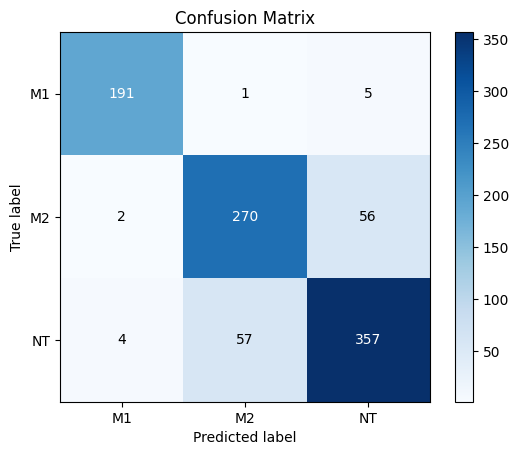

In [7]:
pipe_intensity, test_data_intensity = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_intensity, confusion_matrix=True)

AUC score for M1 0.9982784665423714
AUC score for M2 0.9500991473329368
AUC score for NT 0.9530371383002962
Average AUC 0.9671382507252014


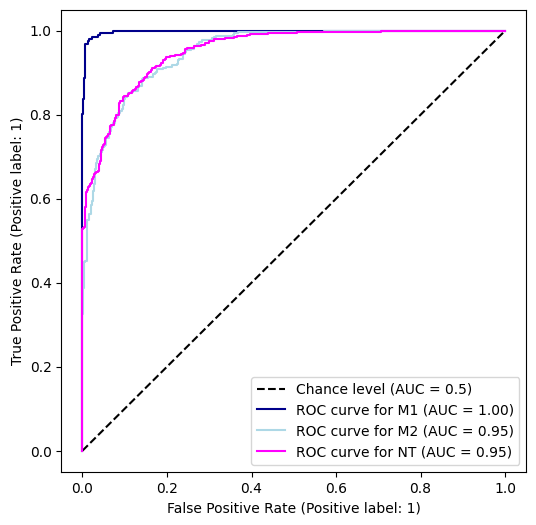

In [8]:
macrophages_analysis.make_multiclass_roc(pipe_intensity, test_data_intensity)

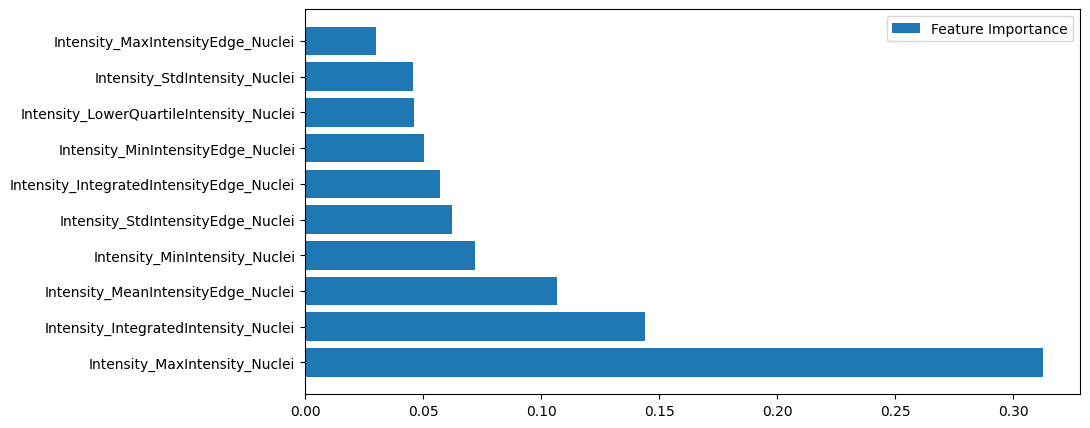

In [9]:
important_features = macrophages_analysis.get_best_features(pipe_intensity, nucleus_dataset_intensity.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()

## 20x_CD206+CD86_P4G4_shape

In [10]:
nucleus_dataset_shape = macrophages_analysis.select_features_by_name(nucleus_dataset, 'Area')

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.6001903695408736
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.6184074770958784
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.5940017404137333


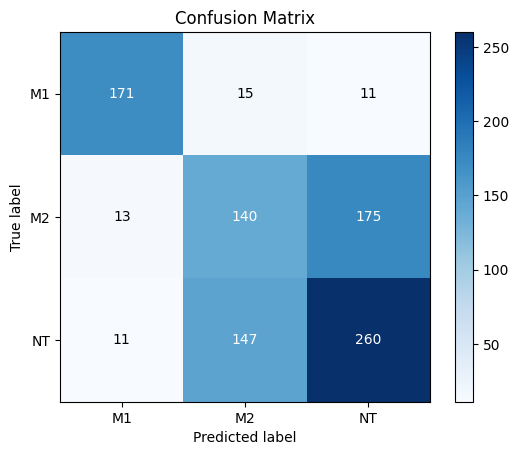

In [11]:
pipe_shape, test_data_shape = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_shape, confusion_matrix=True)

AUC score for M1 0.9853975857704713
AUC score for M2 0.6524588538568312
AUC score for NT 0.6979904306220095
Average AUC 0.7786156234164373


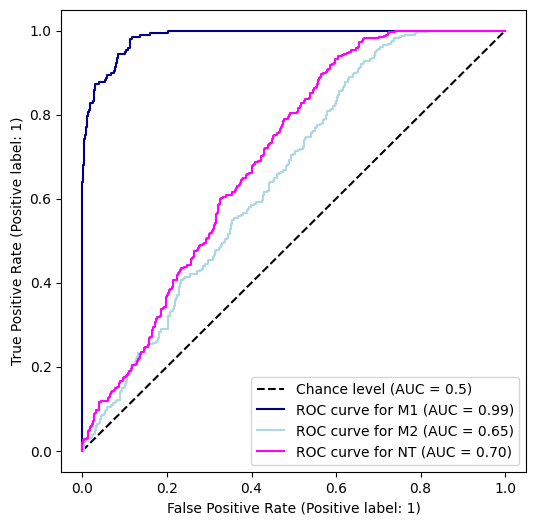

In [12]:
macrophages_analysis.make_multiclass_roc(pipe_shape, test_data_shape)

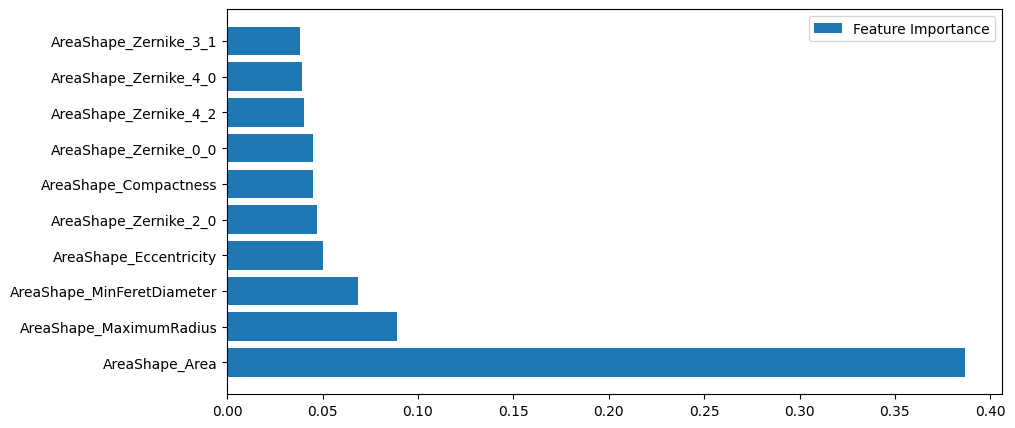

In [13]:
important_features = macrophages_analysis.get_best_features(pipe_shape, nucleus_dataset_shape.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()

## 20x_CD206+CD86_P4G4_texture

In [14]:
nucleus_dataset_texture = macrophages_analysis.select_features_by_name(nucleus_dataset, 'Texture')

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.7847256438969764
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.7740251553344617
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.7859105465607312


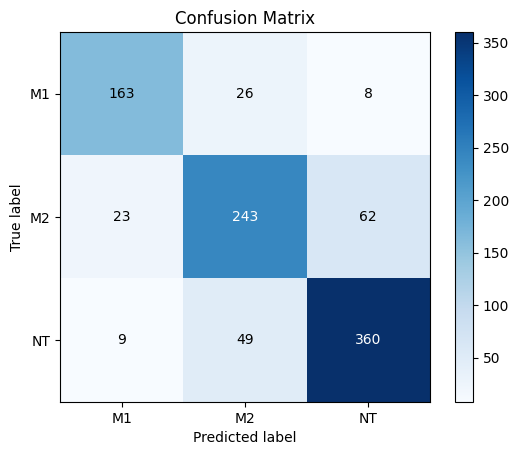

In [15]:
pipe_texture, test_data_texture = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_texture, confusion_matrix=True)

AUC score for M1 0.9647459887589989
AUC score for M2 0.8987457862383502
AUC score for NT 0.9402688539530646
Average AUC 0.9345868763168047


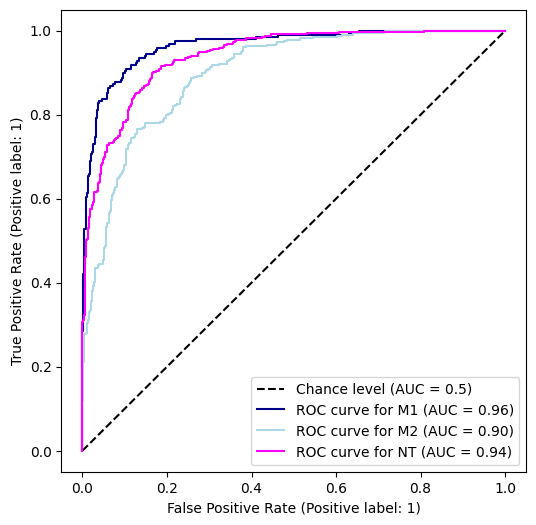

In [16]:
macrophages_analysis.make_multiclass_roc(pipe_texture, test_data_texture)

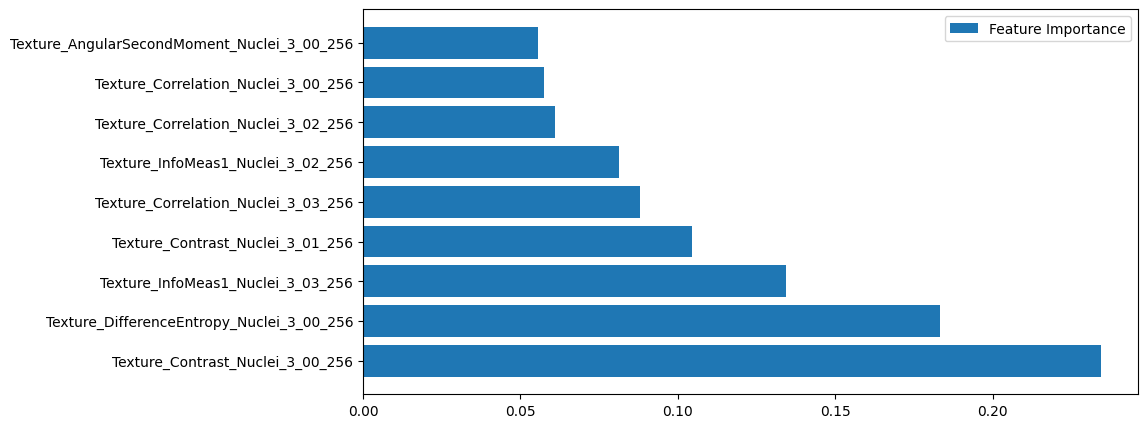

In [17]:
important_features = macrophages_analysis.get_best_features(pipe_texture, nucleus_dataset_texture.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()